In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#gauss_legendre quadrature set
N=16

quadrature_points, weights = np.polynomial.legendre.leggauss(N)

mu_n = np.array(quadrature_points)
w_n = np.array(weights)

In [9]:
#given_data 
h = 0.1
x_j = np.arange(h/2, 15, h)
x_jplushalf = np.arange(0, 15+h, h)

J = len(x_j)
alpha_n = np.zeros(N)
sigma_tj = np.ones(J)

sigma_as = np.array([0.0,  0.003, 0.01, 0.03, 0.1, 0.2, 0.3])



sigma_s1 = 0
flux_0j_old = np.zeros(len(x_j))
flux_1j_old = np.zeros(len(x_j))
flux_0j_new = np.zeros(len(x_j))
flux_1j_new = np.zeros(len(x_j))

In [10]:
psi_n_jplushalf = np.zeros((N,(len(x_jplushalf))))
psi_n_jplushalf[int(N/2):N,0] = 2
psi_n_jplushalf[0:int(N/2), -1 ] = 0;

psi_n_j = np.zeros((N,J))

S_nj = np.zeros((N,len(x_j)))
Q_j = np.zeros((N,len(x_j)))

err = np.Inf

trackofsigma = 0
result_flux = np.zeros((len(sigma_as), len(x_j)))
result_current = np.zeros((len(sigma_as), len(x_j)))
iterations = np.zeros((len(sigma_as)))

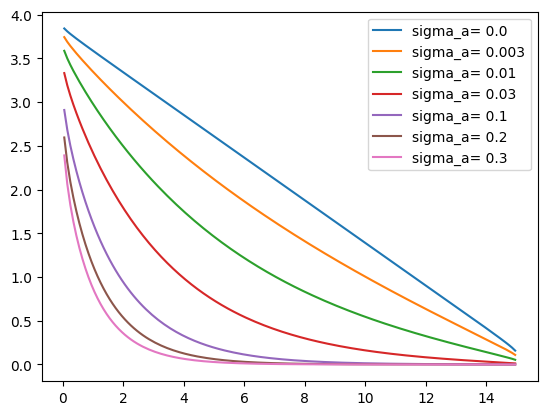

In [11]:
for sigma_a in sigma_as:
    err=np.inf
    sigma_aj = np.ones(J)*sigma_a
    sigma_s0j = sigma_tj - sigma_aj
    sigma_s1 = 0
    flux_0j_old = np.zeros(len(x_j))
    flux_1j_old = np.zeros(len(x_j))
    flux_0j_new = np.zeros(len(x_j))
    flux_1j_new = np.zeros(len(x_j))

    k=1
    while(err>10**-5):
        for n in range(N):
            S_nj[n,:] = 1/2 * (sigma_s0j * flux_0j_old + Q_j[n,:])  + 3/2*mu_n[n]*sigma_s1*flux_1j_old
    
        #left to right
        for j in range(J):
            for n in range(int(N/2),N):
                psi_n_jplushalf[n,j+1] = (1 - (1-alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n])) / (1 + (1+alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n])) * psi_n_jplushalf[n,j] + (S_nj[n,j]*h / mu_n[n] )/ (1 + (1+alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n] ))
                psi_n_j[n,j] = (1+alpha_n[n])/2 * psi_n_jplushalf[n,j+1] + (1-alpha_n[n])/2 * psi_n_jplushalf[n,j]
        
        #right to left
        for j in reversed(range(J)):
            for n in range(0,int(N/2)):
                psi_n_jplushalf[n,j] = (1 + (1+alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n])) / (1 - (1-alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n]))  * psi_n_jplushalf[n,j+1] + (-S_nj[n,j]*h / mu_n[n] )/ (1 - (1-alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n] ))
                psi_n_j[n,j] = (1+alpha_n[n])/2 * psi_n_jplushalf[n,j+1] + (1-alpha_n[n])/2 * psi_n_jplushalf[n,j]
        
        for j in range(J):
            flux_0j_new[j] = sum(w_n*psi_n_j[:,j])
            flux_1j_new[j] = sum(mu_n*w_n*psi_n_j[:,j])
        
        err=max(abs(flux_0j_new-flux_0j_old)/flux_0j_new)
        flux_0j_old = flux_0j_new.copy()
        flux_1j_old = flux_1j_new.copy()
        #print(err)
        k=k+1
    result_flux[trackofsigma,:] = flux_0j_new
    result_current[trackofsigma,:] = flux_1j_new
    plt.plot(x_j, result_flux[trackofsigma,:], label='sigma_a= '+str(sigma_a) )
    iterations[trackofsigma] = k 
    trackofsigma = trackofsigma+1

plt.legend()
plt.show()



In [13]:
result_flux[5]

array([2.59508415e+00, 2.30591795e+00, 2.08878119e+00, 1.90894774e+00,
       1.75254303e+00, 1.61328339e+00, 1.48779938e+00, 1.37395062e+00,
       1.27019242e+00, 1.17531883e+00, 1.08834542e+00, 1.00844725e+00,
       9.34921169e-01, 8.67160291e-01, 8.04635530e-01, 7.46881729e-01,
       6.93486948e-01, 6.44084079e-01, 5.98344179e-01, 5.55971106e-01,
       5.16697164e-01, 4.80279514e-01, 4.46497199e-01, 4.15148646e-01,
       3.86049545e-01, 3.59031042e-01, 3.33938177e-01, 3.10628530e-01,
       2.88971037e-01, 2.68844944e-01, 2.50138884e-01, 2.32750059e-01,
       2.16583502e-01, 2.01551421e-01, 1.87572605e-01, 1.74571889e-01,
       1.62479666e-01, 1.51231451e-01, 1.40767475e-01, 1.31032323e-01,
       1.21974598e-01, 1.13546612e-01, 1.05704112e-01, 9.84060164e-02,
       9.16141819e-02, 8.52931845e-02, 7.94101192e-02, 7.39344157e-02,
       6.88376678e-02, 6.40934757e-02, 5.96773017e-02, 5.55663348e-02,
       5.17393675e-02, 4.81766804e-02, 4.48599359e-02, 4.17720798e-02,
      